##### Análise de intenção de votos dos presidenciáveis 2018

Segundo o [IBOPE](http://www.ibopeinteligencia.com/noticias-e-pesquisas/lula-lidera-disputa-para-2018-bolsonaro-e-marina-empatam-na-maioria-dos-cenarios/), os principais pré-candidatos de 2018 seriam:
 * Luis Inácio da Silva (Lula)
 * Jair Bolsonaro
 * Geraldo Alckimin
 * João Dória
 * Marina Silva
 * Ciro Gomes

***A partir da análise de dados do facebook, vamos entender os assuntos relacionados a alguns dos principais candidatos, bem como suas reações.***

![Candidatos](https://img.estadao.com.br/resources/jpg/2/4/1502712078742.jpg)

In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
warnings.filterwarnings("ignore", 'A value is trying to be set on a copy of a slice from a DataFrame')


In [365]:
#Reading Data
face= pd.read_csv('./data/DatasetFacebook.csv', delimiter=';', encoding = "ISO-8859-1")
face.head()

SRC   METHOD           FROM                                 ID  \
0  ad.alvarodias     POST  ad.alvarodias   199599520097304_1810872098970030   
1  ad.alvarodias  COMMENT            NaN  1810872098970030_1810890865634820   
2  ad.alvarodias    REPLY            NaN  1810872098970030_1810945125629394   
3  ad.alvarodias    REPLY            NaN  1810872098970030_1811078895616017   
4  ad.alvarodias    REPLY            NaN  1810872098970030_1811483528908887   

                        RELATIONSHIP                      DATE  \
0                      ad.alvarodias  2018-02-27T21:32:00+0000   
1   199599520097304_1810872098970030  2018-02-27T21:34:52+0000   
2  1810872098970030_1810890865634820  2018-02-27T22:55:02+0000   
3  1810872098970030_1810890865634820  2018-02-28T02:11:51+0000   
4  1810872098970030_1810890865634820  2018-02-28T12:22:59+0000   

                                             MENTION  REACTIONS  LIKE  LOVE  \
0  Você acha que a criação do Ministério da Segur...        798   696     2   
1  Não adianta ministério e este não funcionar co...         71    70     1   
2                           Parabéns pelo comentário          2     2     0   
3                                  Falou tudo ??????          1     1     0   
4  sou do Rio, Senador. Concordo com que o Código...          0     0     0   

   WOW  HAHA  SAD  ANGRY  THANKFUL  PRIDE  TOTAL COMMENT  SHARE       RANDON  
0    1     6   22     71         0      0            583    153  0,107205556  
1    0     0    0      0         0      0              7      0  0,968696314  
2    0     0    0      0         0      0              0      0  0,099476575  
3    0     0    0      0         0      0              0      0  0,277738496  
4    0     0    0      0         0      0              0      0  0,474025374

#### Exploração do DataSet

In [366]:
print('Registros por Método:\n\n',face.groupby('METHOD').count().ID.sort_values(), '\n')
print('Registros por Source:\n\n',face.groupby('SRC').count().ID.sort_values(ascending=False)[0:10], '\n')
print('Reações por post de Fonte:\n\n')
face[face['METHOD'] == 'POST'].groupby('SRC').sum().loc[:,'REACTIONS':'PRIDE' ].sort_values('REACTIONS',ascending=False)[0:10]


Registros por Método:

 METHOD
POST         5741
REPLY       50114
COMMENT    100433
Name: ID, dtype: int64 

Registros por Source:

 SRC
gauchazh             7638
UOL                  7241
g1                   6911
estadao              5423
Veja                 5151
jornaloglobo         5101
Brasil247            4949
jornalextra          4525
diariocatarinense    4234
Exame                4044
Name: ID, dtype: int64 

Reações por post de Fonte:




REACTIONS    LIKE  LOVE    WOW   HAHA  \
SRC                                                                         
g1                                     209651  143790  6685  15587  18846   
UOL                                    147627  119647  2440   8282   8363   
mblivre                                144808  114112  3051    949  13002   
jairmessias.bolsonaro                   75248   68360  4406    349    132   
Veja                                    74769   58528  3580   1817   5482   
Exame                                   73251   60583  4273   4556   1982   
gauchazh                                70841   54919  3468   2524   7802   
jornalextra                             67584   47272  5546   2487   7318   
jairbolsonaropresidente2018Oficial      54815   49272  2499    249   1662   
estadao                                 49680   35052  3974   1425   5525   

                                      SAD  ANGRY  THANKFUL  PRIDE  
SRC                                                                
g1                                  14918   9825         0      0  
UOL                                  5972   2923         0      0  
mblivre                               548  13146         0      0  
jairmessias.bolsonaro                 104   1897         0      0  
Veja                                 1886   3476         0      0  
Exame                                 482   1375         0      0  
gauchazh                              752   1376         0      0  
jornalextra                          1454   3507         0      0  
jairbolsonaropresidente2018Oficial    224    909         0      0  
estadao                              1274   2430         0      0


Duas páginas páginas relacionadas ao pré-candidato ***Jair Bolsonaro*** estão entre as 10 páginas com maior número de reações.

No entanto, existem outras páginas no dataset que podem apresentar conteúdos que não estão necessariamente relacionados aos pré-candidatos. Essas interações possivelmente não conterão informações muito relevantes acerca dos candidatos, ao menos para essa análise simples.

In [367]:
g1_interacoes = face.loc[(face.SRC == 'g1') & (face.METHOD == 'POST'), 'MENTION']
interacoes = [np.random.randint(0,len(g1_interacoes.index)) for x in range(0,10) ]
for interacao in interacoes:
    print ('Publicação '+ str(g1_interacoes.index[interacao]) + ':', g1_interacoes[g1_interacoes.index[interacao]], '\n')


Publicação 115122: G1 - O Portal de Notícias da Globo shared Globo Esportes post. | Cirurgia é semelhante à que Gabriel Jesus foi submetido logo após a chegada ao City 

Publicação 116500: Considerado o maior traficante de fuzis para o Brasil, Frederik Barbieri foi preso nos EUA no sábado (24) https://glo.bo/2GJsJ68 #G1 

Publicação 110575: Rogério Galloro assume o posto após Fernando Segovia ser demitido com apenas 3 meses e meio no cargo https://glo.bo/2GRZNJ3 #G1 

Publicação 116043: Chefe de facção embarcou em helicóptero com destino à Bolívia, mas aeronave pousou na reserva, onde foi torturado e morto ==> https://glo.bo/2BOCeBL #G1 

Publicação 110575: Rogério Galloro assume o posto após Fernando Segovia ser demitido com apenas 3 meses e meio no cargo https://glo.bo/2GRZNJ3 #G1 

Publicação 115934: Caixa da Previdência do RJ tem 3º maior rombo do país, de R$ 10,2 bi em 2016. Especialistas alertam sobre risco de medida. https://glo.bo/2CpsS0v #G1 

Publicação 116980: Confira o que 

Devemos então procurar por interações que tenham um conteúdo mais claro em relação aos pré-candidatos e eleições ou nas páginas que estejam diretamente ligadas aos candidados (e.g., oCiroGomes). Go to Regex!

In [368]:
termos = '([Mm]arina\s?([Ss]ilva)?)|'                                                   # Marina Silva
termos += '(([Ll]ula)|((Luis\sIn[aá]cio\s)(Lula)?(da\sSilva)?)|([Ee]x-[Pp]residente))|' # Lula
termos += '((Jair\s)?[Bb]olsonaro.*?)|'                                                 # Bolsonaro
termos += '(([Cc]iro)\s?(Gomes))|'                                                      # Ciro Gomes
termos += '((Jo[aã]o)?\s?([Dd][óo]ria))|'                                               # João Dória
termos += '([aA]lvaro\s?[Dd]ias)|'                                                      # Álvaro dias
termos += '(([Gg]eraldo)?\s?(Alcki?min))|'                                              # Geraldo Alckmin
termos += '(([Ee]lei[cç][oõ]es\s?2018)|(#eleicoes2018))'                                # #eleicoes2018
termos = '(' + termos + ')'
precandidatos = re.compile(termos)
interacoes_candidatos = face.SRC.str.contains(precandidatos) | face.MENTION.str.contains(precandidatos)
face_candidatos = pd.DataFrame.copy(face.loc[interacoes_candidatos,])
print ('Total de interações citando alguns dos pré-candidatos e eleições 2018: ', interacoes_candidatos.sum() )

Total de interações citando alguns dos pré-candidatos e eleições 2018:  17159


Quando avaliamos somente as interações citando os candidatos, vemos que o número de registros reduz drasticamente. No entanto, utilizaremos esse novo dataset para entender os assuntos que orbitam ao redor dos pré-candidatos e o "sentimento" contido nessas afirmações.

Novamente vamos ver algumas informações das páginas que citam os candidatos ou páginas diretamente relacionada aos candidatos.

In [369]:
print('Principais páginas e suas respectivas reações citando os candidatos e porcentagem\n\
dos diferentes tipos de reação:')
top10_reacoes=face_candidatos.groupby('SRC').sum().loc[:,'REACTIONS':'PRIDE' ].sort_values('REACTIONS',ascending=False)[0:10]

top10_reacoes['LIKE']     = round( (top10_reacoes['LIKE'] )/ top10_reacoes['REACTIONS'] ,3)
top10_reacoes['LOVE']     = round( (top10_reacoes['LOVE'] )/ top10_reacoes['REACTIONS'] ,3)
top10_reacoes['WOW']      = round( (top10_reacoes['WOW'] )/ top10_reacoes['REACTIONS'] ,3)
top10_reacoes['HAHA']     = round( (top10_reacoes['HAHA'] )/ top10_reacoes['REACTIONS'] ,3)
top10_reacoes['SAD']      = round( (top10_reacoes['SAD'] )/ top10_reacoes['REACTIONS'] ,3)
top10_reacoes['ANGRY']    = round( (top10_reacoes['ANGRY'] )/ top10_reacoes['REACTIONS'] ,3)
top10_reacoes['THANKFUL'] = round( (top10_reacoes['THANKFUL'] )/ top10_reacoes['REACTIONS'] ,3)
top10_reacoes

Principais páginas e suas respectivas reações citando os candidatos e porcentagem
dos diferentes tipos de reação:


REACTIONS   LIKE   LOVE    WOW   HAHA  \
SRC                                                                         
jairmessias.bolsonaro                   81988  0.910  0.057  0.004  0.004   
jairbolsonaropresidente2018Oficial      58705  0.900  0.044  0.004  0.032   
marinasilva.oficial                     32796  0.593  0.149  0.054  0.188   
ad.alvarodias                           28714  0.923  0.037  0.009  0.013   
bolsonaros2                             27078  0.915  0.040  0.002  0.031   
SomostodosJairMessiasBolsonaro          23096  0.727  0.019  0.004  0.246   
TimeCiroGomes                           14494  0.690  0.043  0.009  0.254   
oCiroGomes                              11106  0.855  0.006  0.024  0.045   
jairomessiasbolsonaro                    8295  0.877  0.081  0.009  0.025   
estadao                                  6933  0.676  0.042  0.009  0.197   

                                      SAD  ANGRY  THANKFUL  PRIDE  
SRC                                                                
jairmessias.bolsonaro               0.001  0.023       0.0      0  
jairbolsonaropresidente2018Oficial  0.004  0.016       0.0      0  
marinasilva.oficial                 0.003  0.014       0.0      0  
ad.alvarodias                       0.005  0.014       0.0      0  
bolsonaros2                         0.001  0.011       0.0      0  
SomostodosJairMessiasBolsonaro      0.001  0.004       0.0      0  
TimeCiroGomes                       0.001  0.003       0.0      0  
oCiroGomes                          0.017  0.054       0.0      0  
jairomessiasbolsonaro               0.001  0.007       0.0      0  
estadao                             0.003  0.074       0.0      0

Vamos ver alguns dos comentários dessas menções aos candidatos ou das páginas dos candidatos:

In [370]:
mencoes = [np.random.randint(0,len(face_candidatos.index)) for x in range(0,5) ]
for mencao in mencoes:
    print ('Interação '+ str(face_candidatos.index[mencao]) + ' da página '+ face_candidatos.loc[face_candidatos.index[mencao],'SRC'] + ':',  
           face_candidatos.loc[face_candidatos.index[mencao], 'MENTION'], '\n')

Interação 9802 da página jairbolsonaropresidente2018Oficial: Falo bonito, mulher inteligente, pena que não tá suando inteligência que tem pois quem apoia Bolsonaro tem quê sé correta ! Falo tão bonito mas com o bebê que está no colo dela nem tá preocupada pois o bebê deveria está nó bebê conforto. Fala menos é tenha atitude correta ok. #irresponsável 

Interação 11834 da página TimeLula: Essa justiça Brasileira é diferente das outras  o PSDB e PMDB tem um monte de provas e não vai ser investigado e porque só o PT Justiça canalha 

Interação 6182 da página jairomessiasbolsonaro: Temos que nos armar novamente.Bolsonaro presidente. 

Interação 12274 da página LulaNoXadrez: Lula interrogado na PF em São Paulo sobre repasses de propina da Odebrecht ao seu irmão  Frei Chico 

Interação 8715 da página SomostodosJairMessiasBolsonaro: Quanta bosta juntas 



## Vamos ter uma ideia mais visual das reações das páginas por candidato.

<img src="https://en.facebookbrand.com/wp-content/uploads/2016/09/reactions_12_2017.png" height="100px;" width="400px;"/>

In [371]:
marina    ='([Mm]arina\s?([Ss]ilva)?)'                                                   # Marina Silva
lula      ='(([Ll]ula)|((Luis\sIn[aá]cio\s)(Lula)?(da\sSilva)?)|([Ee]x-[Pp]residente))' # Lula
bolsonaro ='((Jair\s)?[Bb]olsonaro.*?)'                                                 # Bolsonaro
ciro      ='(([Cc]iro)\s?(Gomes))'                                                      # Ciro Gomes
doria     ='((Jo[aã]o)?\s?([Dd][óo]ria))'                                               # João Dória
dias      ='([aA]lvaro\s?[Dd]ias)'                                                      # Álvaro dias
alckmin   ='(([Gg]eraldo)?\s?(Alcki?min))'                                              # Geraldo Alckmin

df_marina    = pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(marina) ])
df_marina['Candidato'] = 'marina'
df_lula      =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(lula) ])
df_lula['Candidato'] = 'lula'
df_bolsonaro =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(bolsonaro)])
df_bolsonaro['Candidato'] = 'bolsonaro'
df_ciro      =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(ciro) ])
df_ciro['Candidato'] ='ciro'
df_doria     =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(doria)])
df_doria['Candidato'] ='doria'
df_dias      =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(dias)])
df_dias['Candidato']='adias'
df_alckmin   =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(alckmin)])
df_alckmin['Candidato'] = 'alckmin'
dfs = [df_marina,df_lula, df_bolsonaro, df_ciro,df_dias,df_doria,df_alckmin]
dfs = pd.concat(dfs)
print(dfs.shape)
dfs = dfs.groupby('Candidato', as_index=False,axis=0).sum()
dfs2 = pd.DataFrame.copy(dfs)
colunas = ['LIKE', 'LOVE', 'WOW' ,'HAHA', 'SAD', 'ANGRY']
for coluna in colunas:
    dfs2[coluna] = round (dfs2[coluna] / dfs2.REACTIONS,3)

dfs2 = dfs2.iloc[:,[0,2,3,4,5,6,7]]
dfs2 = dfs2.melt(id_vars=['Candidato'], var_name='Reações',value_name='Quantidade')
dfs = dfs.iloc[:,[0,2,3,4,5,6,7]]
dfs = dfs.melt(id_vars=['Candidato'], var_name='Reações',value_name='Quantidade')


(11098, 20)


In [372]:
plt.figure(figsize=(10,4))
plt.style.use('ggplot')
p1=plt.bar('Candidato','Quantidade', data=dfs[dfs.Reações == 'LIKE'], color='#3F51B5' )   
p2=plt.bar('Candidato','Quantidade', data=dfs[dfs.Reações == 'LOVE'], color='#E91E63' )   
p3=plt.bar('Candidato','Quantidade', data=dfs[dfs.Reações == 'WOW'], color='#4CAF50'  )   
p4=plt.bar('Candidato','Quantidade', data=dfs[dfs.Reações == 'HAHA'], color='#CDDC39' )   
p5=plt.bar('Candidato','Quantidade', data=dfs[dfs.Reações == 'SAD'], color='#607D8B'  )   
p6=plt.bar('Candidato','Quantidade', data=dfs[dfs.Reações == 'ANGRY'], color='#F44336')   

g = (p1[0],p2[0],p3[0],p4[0],p5[0],p6[0])
plt.legend(g,dfs.Reações.unique() )
plt.suptitle('Tipos de Reações por candidato')
plt.show()

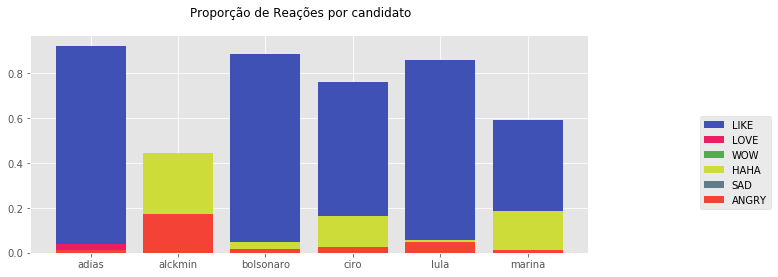

In [373]:
plt.figure(figsize=(10,4))
plt.style.use('ggplot')
p1=plt.bar('Candidato','Quantidade', data=dfs2[dfs2.Reações == 'LIKE'], color='#3F51B5' )   
p2=plt.bar('Candidato','Quantidade', data=dfs2[dfs2.Reações == 'LOVE'], color='#E91E63' )   
p3=plt.bar('Candidato','Quantidade', data=dfs2[dfs2.Reações == 'WOW'], color='#4CAF50'  )   
p4=plt.bar('Candidato','Quantidade', data=dfs2[dfs2.Reações == 'HAHA'], color='#CDDC39' )   
p5=plt.bar('Candidato','Quantidade', data=dfs2[dfs2.Reações == 'SAD'], color='#607D8B'  )   
p6=plt.bar('Candidato','Quantidade', data=dfs2[dfs2.Reações == 'ANGRY'], color='#F44336')   

g = (p1[0],p2[0],p3[0],p4[0],p5[0],p6[0])
plt.legend(g,dfs.Reações.unique(), loc=(1.2,0.2))
plt.suptitle('Proporção de Reações por candidato')
plt.show()

### Significado das reações

Embora os gráficos acima apresentem a distribuição de reações consideradas positivas (e.g., likes) e negativas (e.g., angry), não podemos saber nada a respeito do conteúdo do post, comentário ou resposta. Ou seja, ter um like não significa algo positivo para o candidato necessariamente. Para isso teremos que avaliar o conteúdo das menções de cada candidato.

**Vamos ver quais palavras são mais usadas nas interações em que o nome dos candidatos aparecem**

Para isso precisaremos:


* Limpar o corpus removendo stopwords
* Transformar tudo para lowercase e removendo acentuações (acentos podem ser importantes por expressar emoções como ":)", mas para simplificar a análise, removeremos esses caracteres)


In [374]:
from nltk.corpus import stopwords
stop = stopwords.words('portuguese')
stop.append('q')
stop.append('é')
stop.append('pra')
stop.append('pro')
stop.append('tá')
stop.append('dá')
stop.append('vc')
stop.append('nao')
stop.append('pq')
df_marina    = pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(marina)|face_candidatos.MENTION.str.contains(marina) ])
df_marina['Candidato'] = 'marina'
df_lula      =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(lula)| face_candidatos.MENTION.str.contains(lula) ])
df_lula['Candidato'] = 'lula'
df_bolsonaro =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(bolsonaro)| face_candidatos.MENTION.str.contains(bolsonaro)])
df_bolsonaro['Candidato'] = 'bolsonaro'
df_ciro      =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(ciro)| face_candidatos.MENTION.str.contains(ciro) ])
df_ciro['Candidato'] ='ciro'
df_doria     =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(doria)| face_candidatos.MENTION.str.contains(doria)])
df_doria['Candidato'] ='doria'
df_dias      =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(dias)| face_candidatos.MENTION.str.contains(dias)])
df_dias['Candidato']='adias'
df_alckmin   =  pd.DataFrame(face_candidatos.loc [face_candidatos.SRC.str.contains(alckmin)| face_candidatos.MENTION.str.contains(alckmin)])
df_alckmin['Candidato'] = 'alckmin'

face_candidatos_2 = pd.concat([df_alckmin, df_ciro,df_bolsonaro,df_dias,df_doria,df_lula,df_marina])
print (face_candidatos_2.shape)
face_candidatos_2['MENCOES_PROCESSADAS']=face_candidatos_2.MENTION.str.lower()
sites = re.compile('((http(s)?://)?[wW]{3}\..*\.com(\.br)?)')
face_candidatos_2['MENCOES_PROCESSADAS']=face_candidatos_2.MENCOES_PROCESSADAS.str.replace(sites, '')
face_candidatos_2['MENCOES_PROCESSADAS']=face_candidatos_2.MENCOES_PROCESSADAS.str.replace('[!,.:;?@\(\)0-9]', '')
face_candidatos_2.MENCOES_PROCESSADAS.str.contains(sites).sum()

#Algumas ocorrências de palavras sem muito sentido
pattern = re.compile('(_gplljvx|_homicidios_brasil_ranking_joao_rw|_iix|_ú|aa|aaa|aaaa|aaaah|aaaffffff|[k]+|wfzjwlvdvmxpqsnse)')

face_candidatos_2['MENCOES_PROCESSADAS']=face_candidatos_2.MENCOES_PROCESSADAS.str.replace(pattern, ' ')
face_candidatos_2['MENCOES_PROCESSADAS']=face_candidatos_2.MENCOES_PROCESSADAS.str.replace('[_]', ' ')
def processaPalavras(palavras):
        processada=[palavra for palavra in palavras.split() if not palavra in stop]
        return " ".join(processada)
face_candidatos_2['MENCOES_PROCESSADAS'] = face_candidatos_2.MENCOES_PROCESSADAS.apply(processaPalavras)



(18075, 20)


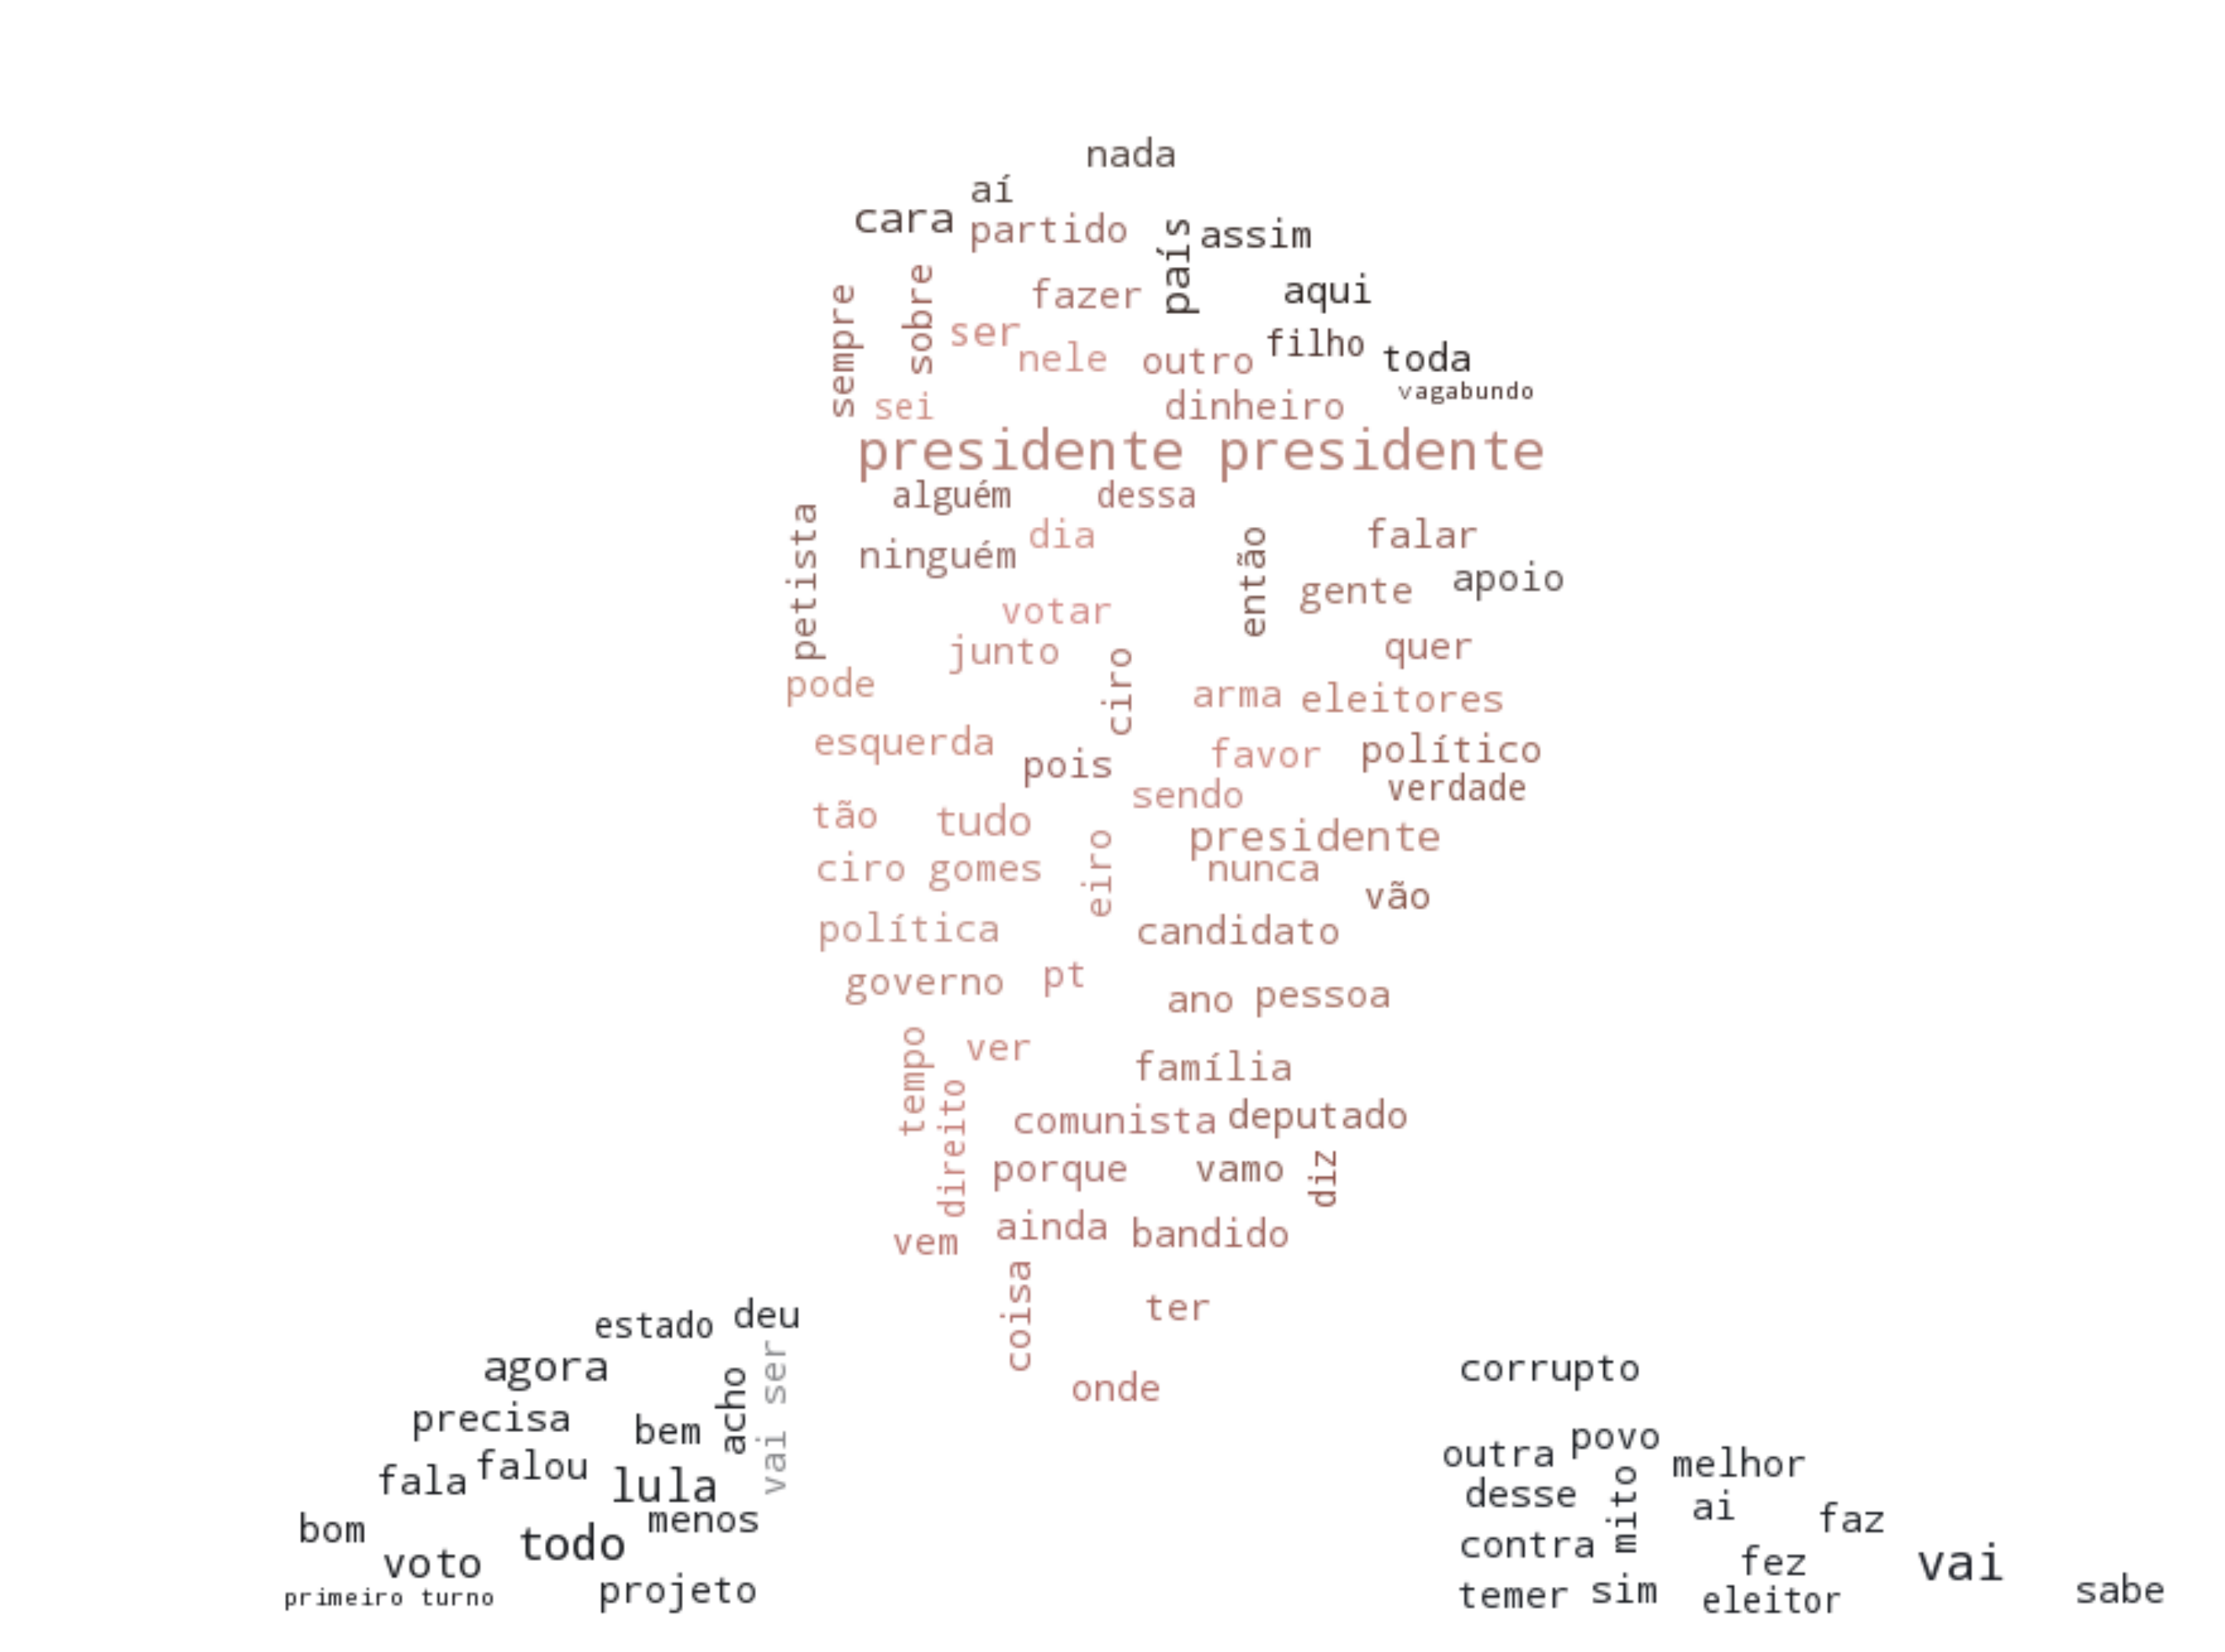

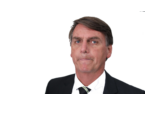

In [375]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
img = np.array(Image.open('./bolso2.png'))
palavras = set(face_candidatos_2.MENCOES_PROCESSADAS[face_candidatos_2.MENCOES_PROCESSADAS.str.contains('bolsonaro')].str.replace('(bolsonaro|jair|messias|brasil)', ''))

wc = WordCloud(background_color="white",width = 1000, height = 1000, 
                            max_words=100, mask=img, 
                            margin=10,random_state=1)
wc.generate(' '.join(palavras))
image_colors = ImageColorGenerator(img)
plt.figure(figsize=(50,50))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()
plt.figure(figsize=(2,2))
plt.imshow(img, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

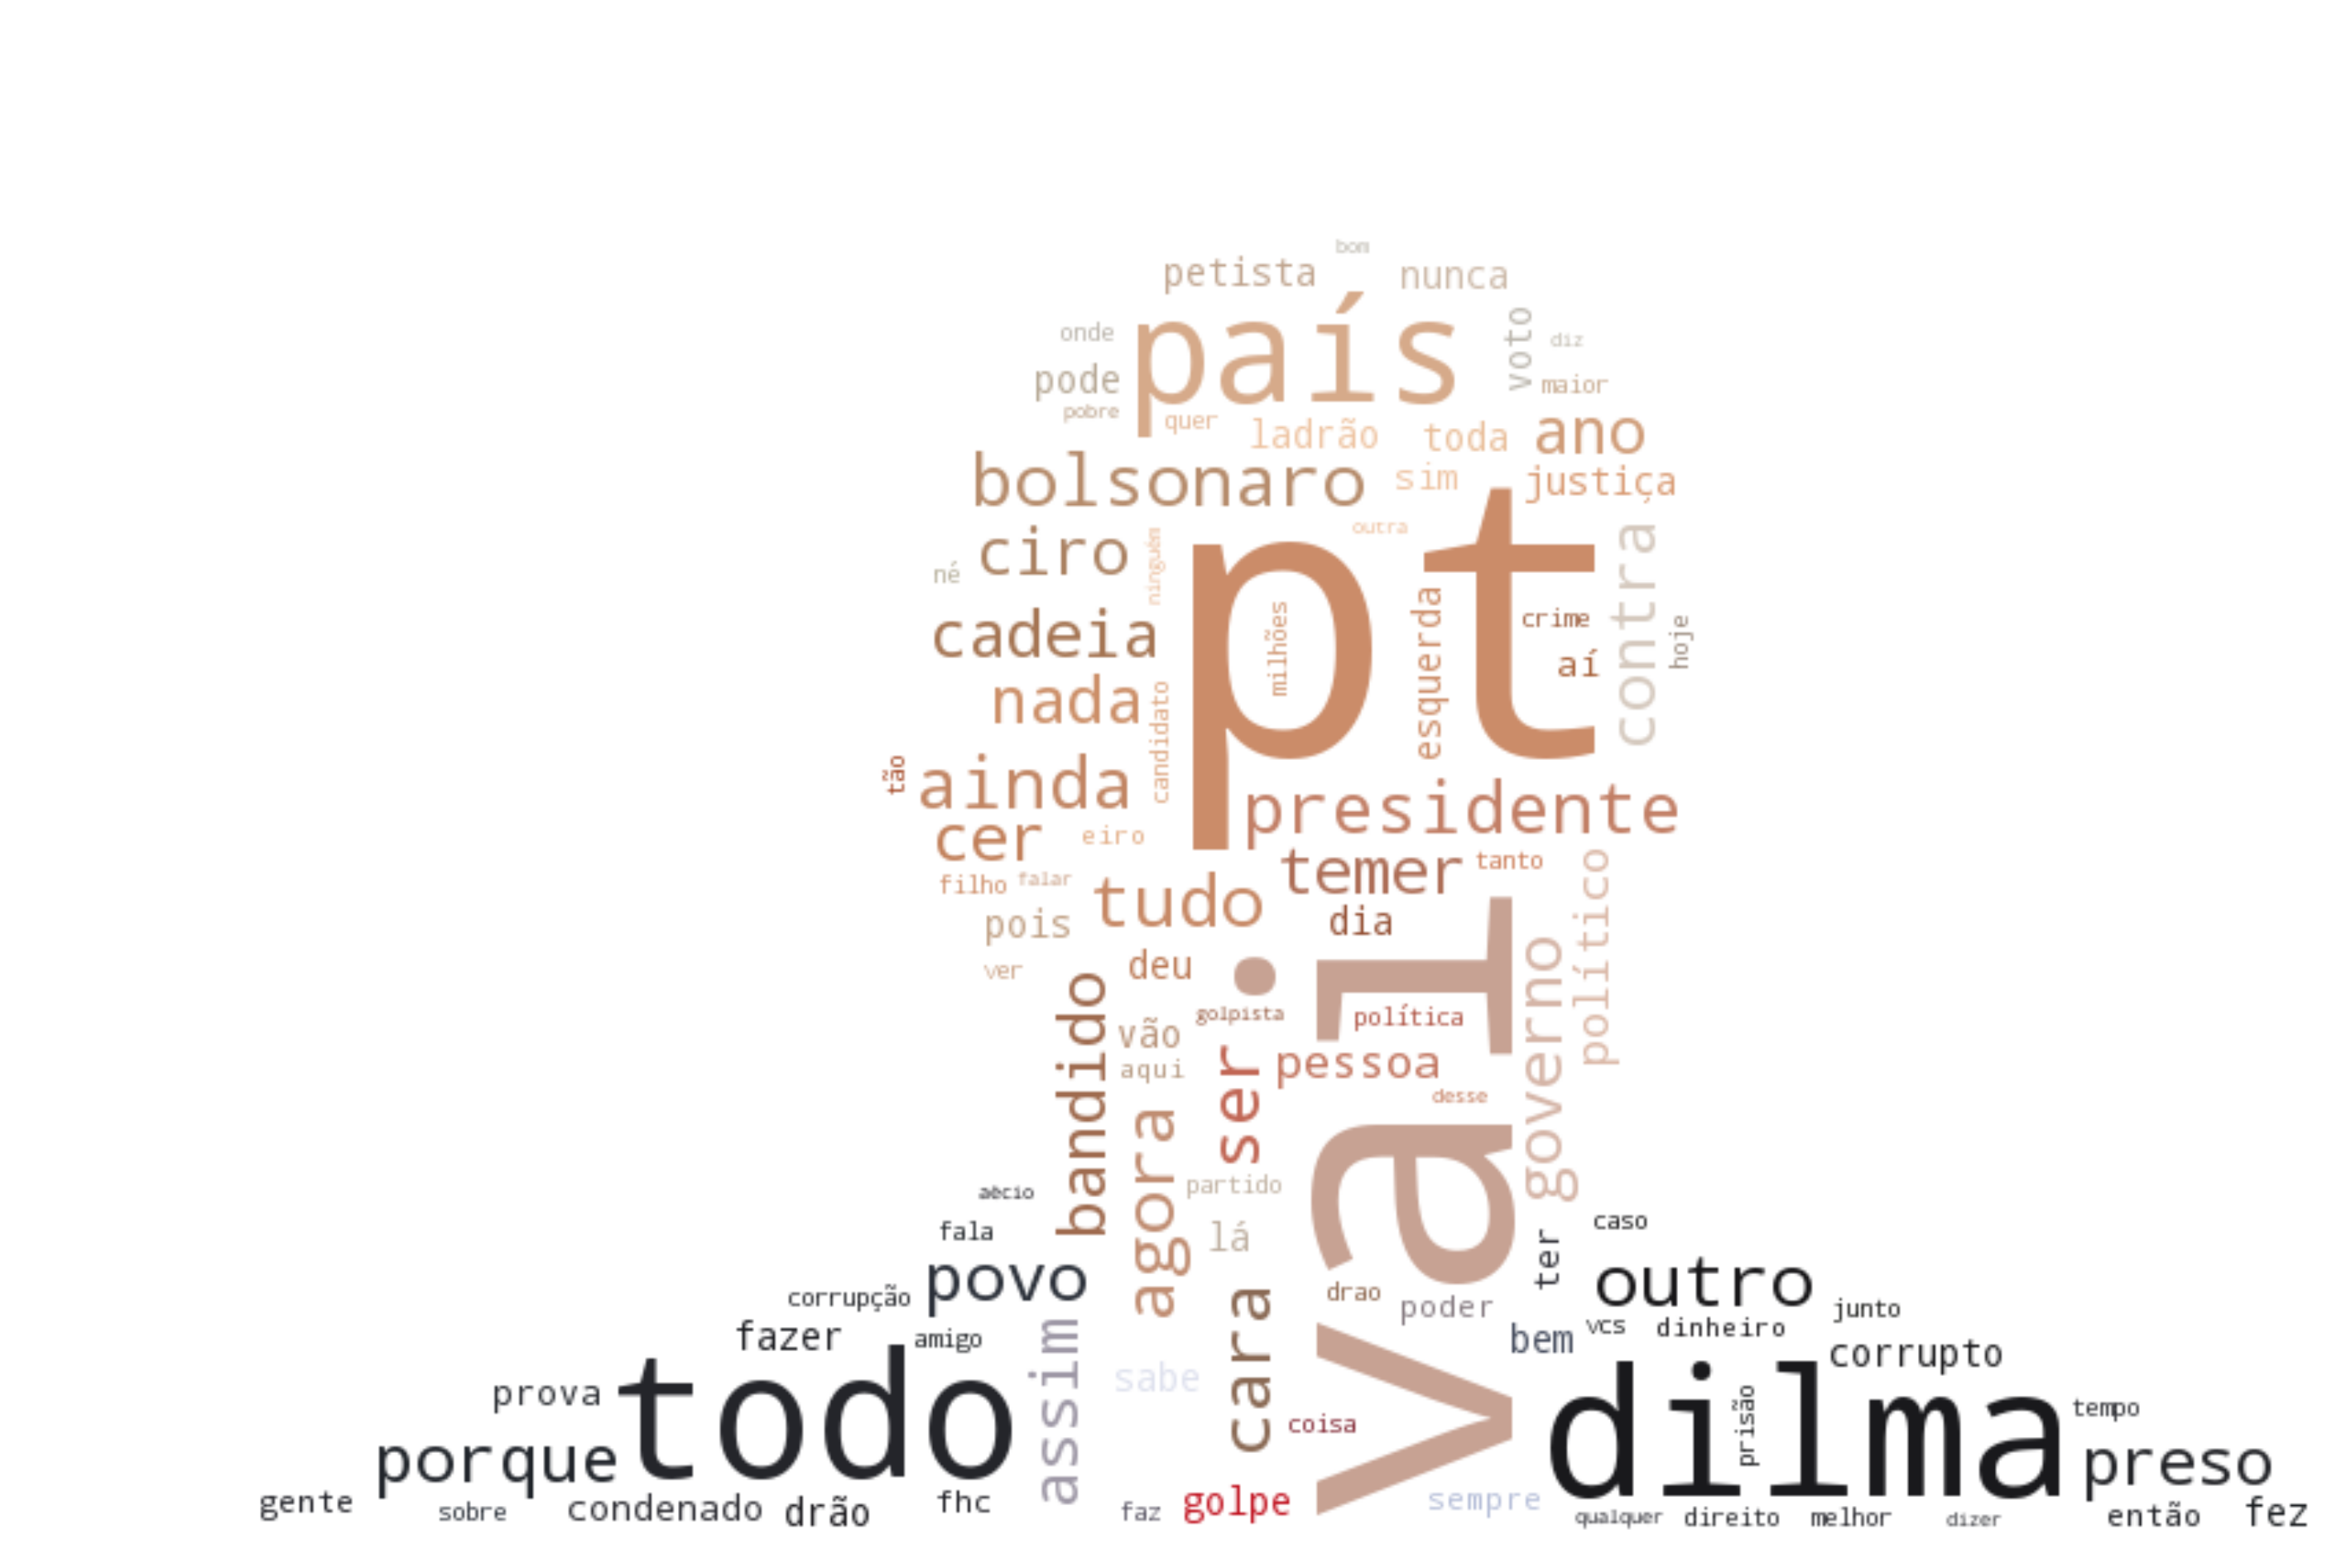

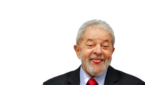

In [376]:
img = np.array(Image.open('./lula.jpg'))
palavras = set(face_candidatos_2.MENCOES_PROCESSADAS[face_candidatos_2.MENCOES_PROCESSADAS.str.contains('lula')].str.replace('(lula|brasil)', ''))
wc = WordCloud(background_color="white", 
                            max_words=100, mask=img ,
                            margin=10,random_state=1)
wc.generate(' '.join(palavras))
image_colors = ImageColorGenerator(img)
plt.figure(figsize=(50,50))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()
plt.figure(figsize=(2,2))
plt.imshow(img, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

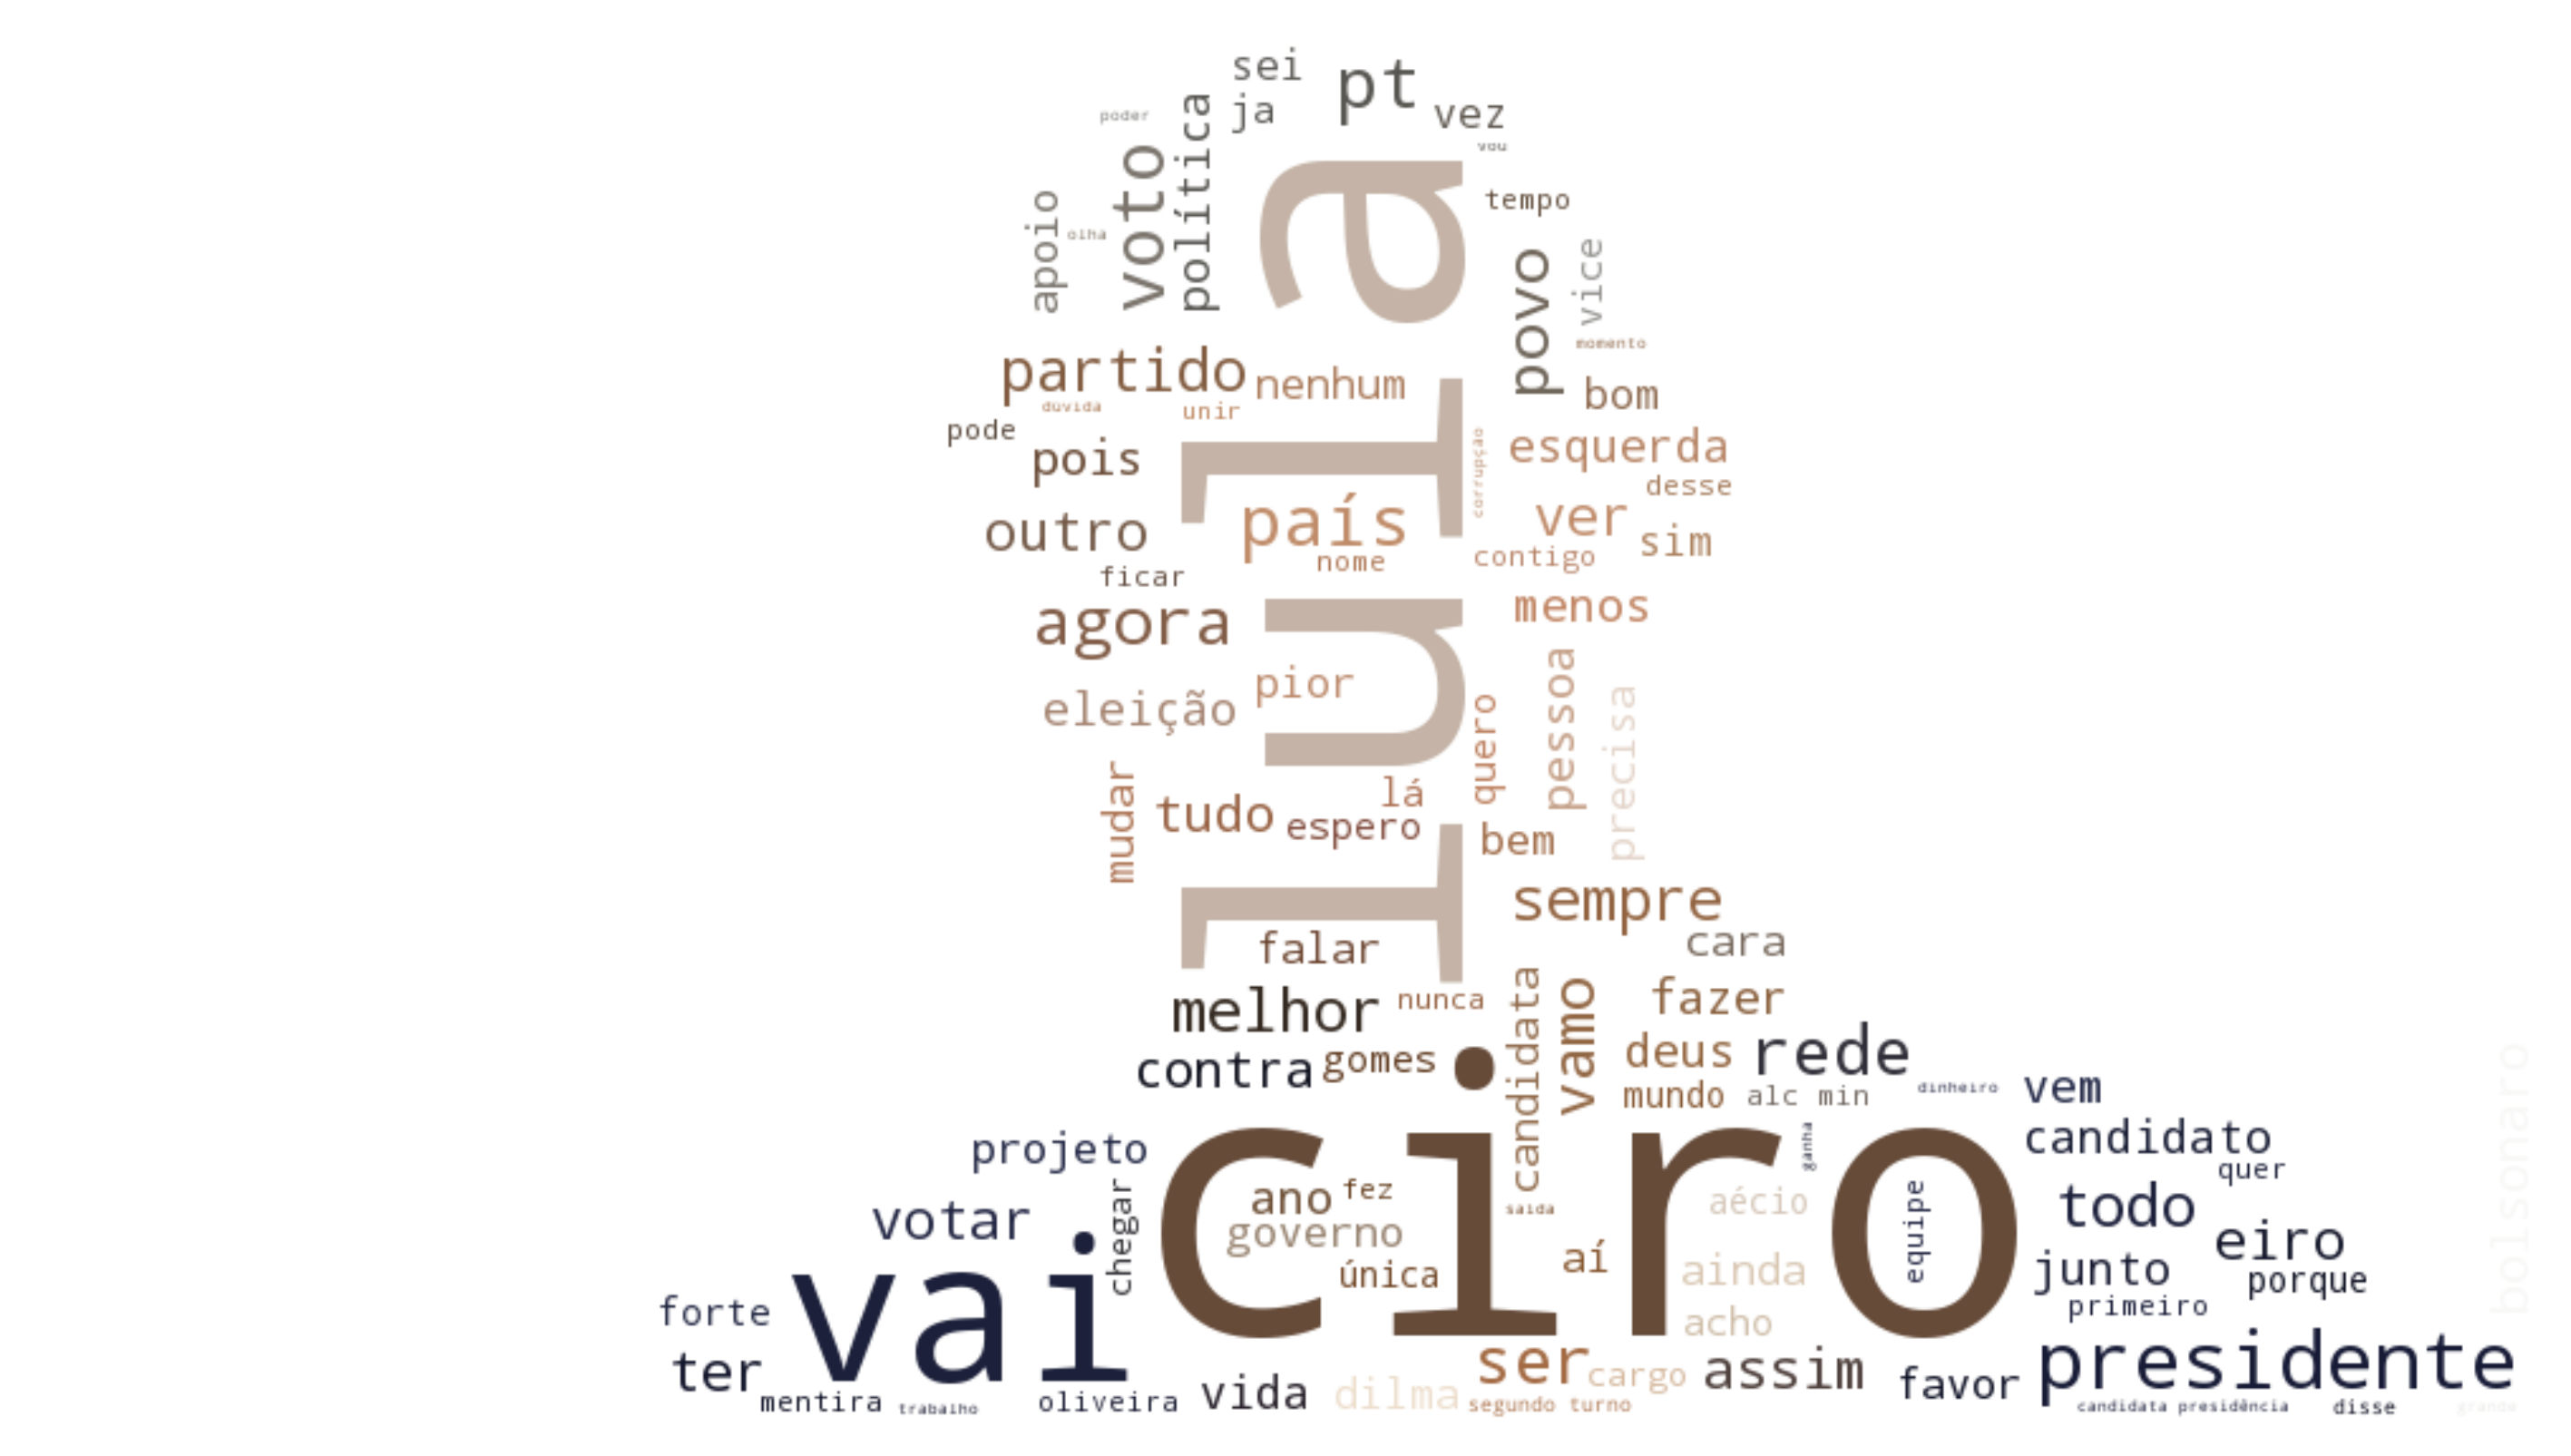

In [377]:
img = np.array(Image.open('./marina.jpg'))
palavras = set(face_candidatos_2.MENCOES_PROCESSADAS[face_candidatos_2.MENCOES_PROCESSADAS.str.contains('marina')].str.replace('(marina|silva|brasil)', ''))

wc = WordCloud(background_color="white", 
                            max_words=100, mask=img ,
                            margin=10,random_state=1)
wc.generate(' '.join(palavras))
image_colors = ImageColorGenerator(img)
plt.figure(figsize=(50,50))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()
plt.figure(figsize=(2,2))
plt.imshow(img, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

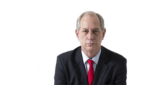

In [378]:
img = np.array(Image.open('./ciro.jpg'))
palavras = set(face_candidatos_2.MENCOES_PROCESSADAS[face_candidatos_2.MENCOES_PROCESSADAS.str.contains('(ciro)')].str.replace('(ciro|gomes|brasil)', ''))

wc = WordCloud(background_color="white", 
                            max_words=100, mask=img ,
                            margin=10,random_state=1)
wc.generate(' '.join(palavras))
image_colors = ImageColorGenerator(img)
plt.figure(figsize=(50,50))
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()
plt.figure(figsize=(2,2))
plt.imshow(img, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

# Análise de sentimento

Para análise de sentimento utilizamos um léxico já publicado e comparamos com as palavaras que aparecem nas interações onde os pré-candidatos são citados e/ou de páginas (SRC) diretamente relacionadas aos mesmos.

Para fazer a análise de sentimentos das menções e relacioná-la a um dos pré-candidatos, vamos seguir a mesma abordagem para mensurar a quantidade de reações por candidato, a saber:

* Um registro é classificado como sendo de um candidato se, o SRC da interação tiver o nome do candidato e/ou o nome do mesmo for comentado diretamente na menção.

* Utilizaremos aqui uma abordagem léxica, por não carecer de dados de treinamento já classificados para criação do modelo.[[Benevenuto,F.](http://homepages.dcc.ufmg.br/~fabricio/download/webmedia-short-course.pdf), [Taboada, *et al.*](https://www.mitpressjournals.org/doi/pdf/10.1162/COLI_a_00049)]

***Obs.: essa abordagem pode duplicar registros e enviesar os resultados, mas tendo em vista a dimensão espaço/tempo, decidi assumir o risco. Esse risco poderia ser calculado também.***

A escolha do léxico foi uma decisão prática, pois não conheço tão bem os métodos de criação de dicionários e léxicos. Sendo assim, optei pelo léxico da OntoLP, chamado OpLexicon v3.0 ([link](http://ontolp.inf.pucrs.br/Recursos/downloads-OpLexicon.php]))

In [379]:
lexical = pd.read_csv('./data/lexico_v3.0.txt', names=['Word', 'Class','Sentiment', 'Update'] )
lexical.tail()

def getSentimento(sentenca):
    return lexical.loc[lexical.Word.isin(sentenca.split()),].Sentiment.sum()    
face_candidatos_2['Sentimento'] = face_candidatos_2.MENCOES_PROCESSADAS.apply(getSentimento)

### Abaixo vemos a distribuição dos valores de sentimento 

In [380]:
face_candidatos_2['Sentimento_norm'] = (face_candidatos_2.Sentimento - face_candidatos_2.Sentimento.mean())/face_candidatos_2.Sentimento.std()
plt.hist(face_candidatos_2.Sentimento.values)
plt.xlabel('Score de Sentimento para cada sentenças')
plt.show()
plt.hist(face_candidatos_2.Sentimento_norm.values)
plt.xlabel('Z-score do Sentimento de cada sentença')
plt.show()

#### Vamos avaliar os sentimentos por candidato

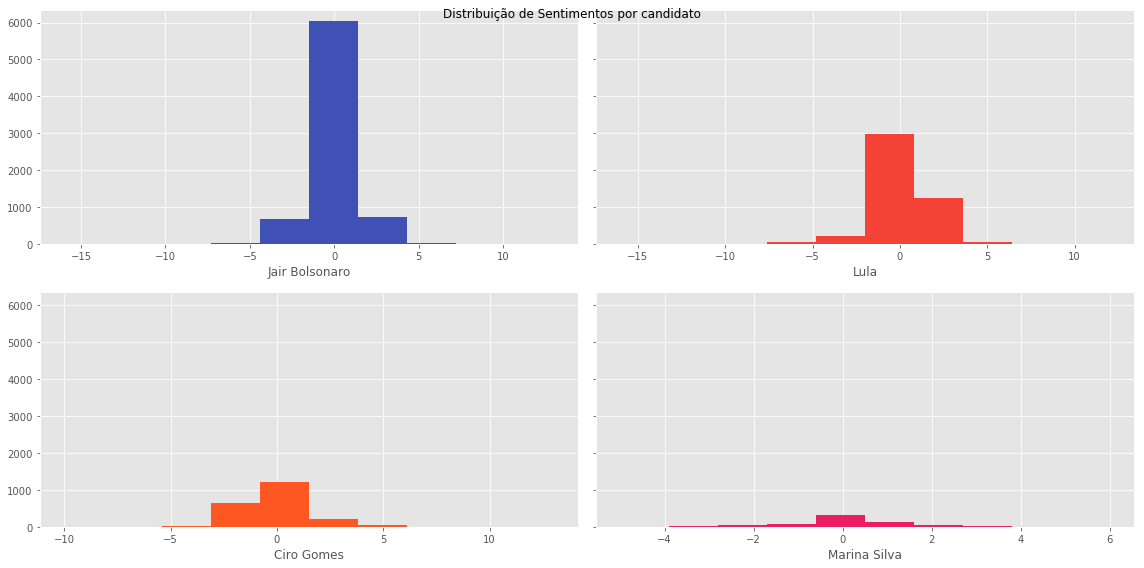

In [381]:
fig,axn = plt.subplots(2,2, sharex=False, sharey=True, figsize=(16,8))

axn.flat[0].hist(face_candidatos_2[face_candidatos_2.Candidato == 'bolsonaro'].Sentimento.values,color='#3F51B5' )
axn.flat[0].set_xlabel('Jair Bolsonaro')
axn.flat[1].hist(face_candidatos_2[face_candidatos_2.Candidato == 'lula'].Sentimento.values, color='#F44336')
axn.flat[1].set_xlabel('Lula')
axn.flat[2].hist(face_candidatos_2[face_candidatos_2.Candidato == 'ciro'].Sentimento.values, color='#FF5722' )
axn.flat[2].set_xlabel('Ciro Gomes')
axn.flat[3].hist(face_candidatos_2[face_candidatos_2.Candidato == 'marina'].Sentimento.values, color='#E91E63' )
axn.flat[3].set_xlabel('Marina Silva')
plt.suptitle('Distribuição de Sentimentos por candidato')
plt.tight_layout()
plt.show()

### Intenções de voto

Foram consideradas como possíveis intenções de voto as sentenças que apresentaram score >= 2.

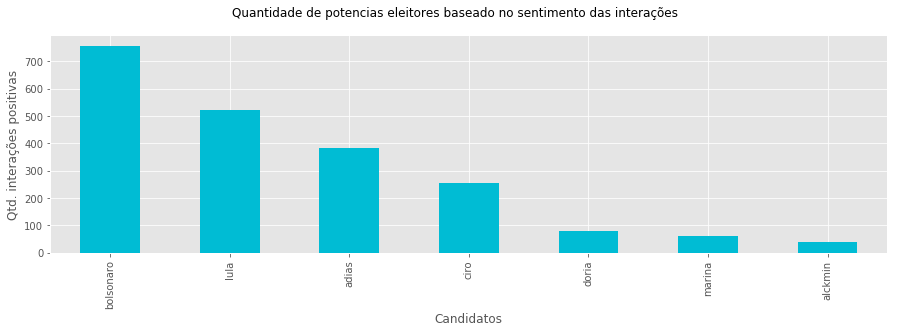

In [382]:
intencoes = face_candidatos_2[face_candidatos_2.Sentimento >= 2 ].groupby('Candidato', as_index=False).count().sort_values('Sentimento',ascending=False)
plt.figure(figsize=(15,4))
ax = intencoes.Sentimento.plot(kind='bar',facecolor='#00BCD4')
ax.set_xticklabels(intencoes.Candidato)
plt.suptitle('Quantidade de potencias eleitores baseado no sentimento das interações')
ax.set_xlabel('Candidatos')
ax.set_ylabel('Qtd. interações positivas')
plt.show()

## Bag of Words (BoW)

In [394]:
from sklearn.feature_extraction.text import CountVectorizer
tokenizador = CountVectorizer()
feature_set = tokenizador.fit_transform(face_candidatos_2.MENCOES_PROCESSADAS)
print(feature_set.shape)
tokenizador.get_feature_names()[5:100:10]

(18075, 29502)


['abaixa',
 'abandonados',
 'abastecendo',
 'abatido',
 'abeas',
 'abençoar',
 'abertas',
 'abestalhados',
 'abomino',
 'abortistas']

### TDF-IF

In [384]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer1 = TfidfVectorizer(encoding='utf-8')
vectorizer2 = TfidfVectorizer(encoding='utf-8')
vectorizer3 = TfidfVectorizer(encoding='utf-8')
vectorizer4 = TfidfVectorizer(encoding='utf-8')

principais_assuntos_bolsonaro = vectorizer1.fit_transform(face_candidatos_2[face_candidatos_2.Candidato=='bolsonaro'].MENCOES_PROCESSADAS)
principais_assuntos_lula = vectorizer2.fit_transform(face_candidatos_2[face_candidatos_2.Candidato=='lula'].MENCOES_PROCESSADAS)
principais_assuntos_marina = vectorizer3.fit_transform(face_candidatos_2[face_candidatos_2.Candidato=='marina'].MENCOES_PROCESSADAS)
principais_assuntos_ciro = vectorizer4.fit_transform(face_candidatos_2[face_candidatos_2.Candidato=='ciro'].MENCOES_PROCESSADAS)


bolsonaro_dense = principais_assuntos_bolsonaro.todense()
bolsonaro_text = bolsonaro_dense[0].tolist()[0]

lula_dense = principais_assuntos_lula.todense()
lula_text = lula_dense[0].tolist()[0]

marina_dense = principais_assuntos_marina.todense()
marina_text = marina_dense[0].tolist()[0]

ciro_dense = principais_assuntos_ciro.todense()
ciro_text = ciro_dense[0].tolist()[0]

In [385]:
print('Principais assuntos Bolsonaro:')
feature_names = vectorizer1.get_feature_names()
phrase_scores = [pair for pair in zip(range(0, len(bolsonaro_text)), bolsonaro_text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:20]:
   print('{0: <20} {1}'.format(phrase, score))

Principais assuntos Bolsonaro:
cabide               0.27079086129644225
restante             0.27079086129644225
colocando            0.26565897089716434
pauta                0.25729236425527297
propriedade          0.2477150281882891
ministério           0.23241655819816173
emprego              0.22753592476502238
assunto              0.22605606380155546
área                 0.22605606380155546
único                0.2093407250900086
momento              0.2044600916568692
feito                0.20156336197198285
vejo                 0.19526323275962115
falando              0.19046096277574254
segurança            0.18176473571845184
político             0.17990439758524918
deve                 0.17518865497948766
políticos            0.17133736053669402
sobre                0.16891019279684588
sempre               0.1673851296675894


In [386]:
print('Principais assuntos Lula:')
feature_names = vectorizer2.get_feature_names()
phrase_scores = [pair for pair in zip(range(0, len(lula_text)), lula_text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:20]:
   print('{0: <20} {1}'.format(phrase, score))

Principais assuntos Lula:
violência            0.3203248445777222
solução              0.31365627353601006
corrupção            0.21996835778506232
caixaestou           0.19432844348611703
dêem                 0.19432844348611703
emergencial          0.19432844348611703
maciço               0.19432844348611703
mater                0.19432844348611703
prazoagora           0.19432844348611703
positivo             0.18762537909891866
longo                0.1824260784289127
torcendo             0.1824260784289127
funcionar            0.178177940462064
toque                0.17458619098874326
investimento         0.162027437438011
medidas              0.162027437438011
combate              0.1601624222888611
resultado            0.15843568796469024
célula               0.14790432130466538
senador              0.14686858409623474


In [387]:
print('Principais assuntos Marina:')
feature_names = vectorizer3.get_feature_names()
phrase_scores = [pair for pair in zip(range(0, len(marina_text)), marina_text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:20]:
   print('{0: <20} {1}'.format(phrase, score))

Principais assuntos Marina:
engolir              0.49434930906863167
vicefeliciano        0.49434930906863167
depende              0.47198191148136204
senador              0.4180894376057859
voto                 0.3079119809368788
marina               0.13733910819259526


In [388]:
print('Principais assuntos Ciro Gomes:')
feature_names = vectorizer4.get_feature_names()
phrase_scores = [pair for pair in zip(range(0, len(ciro_text)), ciro_text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:20]:
   print('{0: <20} {1}'.format(phrase, score))

Principais assuntos Ciro Gomes:
região               0.3396344458489965
sc                   0.3101646809285065
aovivo               0.29292597354495203
racional             0.29292597354495203
gomess               0.2806949160080165
live                 0.2806949160080165
caçador              0.2756872661613976
imprensa             0.2756872661613976
entrevista           0.2671555742097352
pessoal              0.2512251510875265
video                0.2439187855490224
shared               0.22743259132708843
ciro                 0.21612318634581795
gomes                0.12178458918206404


# Conclusão

* Com base nos dados e análises realizadas, o pré-candidato Jair Bolsonaro apresentou maior popularidade no facebook e aparentemente maior representatividade dos potenciais eleitores.
* Por se tratar de uma análise exploratória e um tanto simplória, não é possivel predizer resultados eleitorais. Além disso, embora dados das Redes Sociais sejam extremamente úteis para entendermos comportamento e predizer tendências, no Brasil há uma certa discrepância entre popularidade da internet e a intenção de voto [[Vasconcelos](https://fabiovasconcellos10.wordpress.com/2017/11/12/como-o-facebook-espelha-a-distribuicao-das-intencoes-de-voto-de-lula-e-bolsonaro/)].
